In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv('Dataset/Mall_Customers.csv')  
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### <font color = blue> Predictor Attribute

In [3]:
X = dataset.iloc[:, [3,4]].values   # we have only X here becuase we are working Unsupervised data

#### <font color = blue> Import k-Means from sklean

In [4]:
from sklearn.cluster import KMeans

#### <font color = blue> let's plot elbow method graph 
Elbow method is basically helps us to find optimal number of clusters

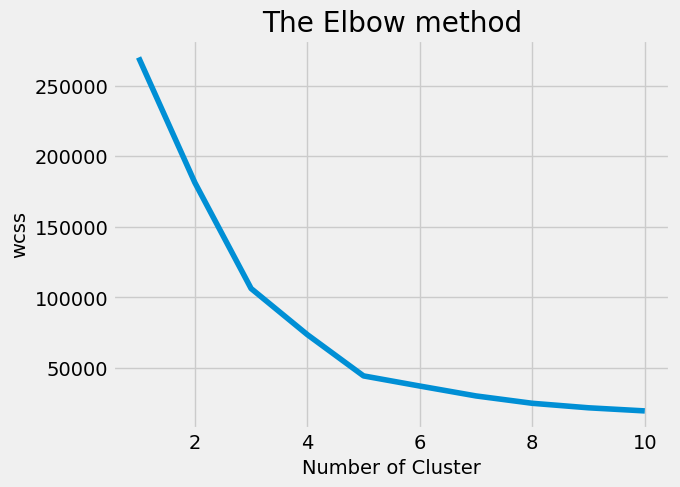

In [5]:
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0, )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show()

#### <font color = blue> Build K-Means with optimal no. of Clusters

In [6]:
kmeans = KMeans(n_clusters= 5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans

KMeans(n_clusters=5, n_init=10, random_state=0)

#### <font color = blue> Making a Prediction

In [7]:
y_kmeans = kmeans.fit_predict(X)

#### <font color = blue> Visulising the Result

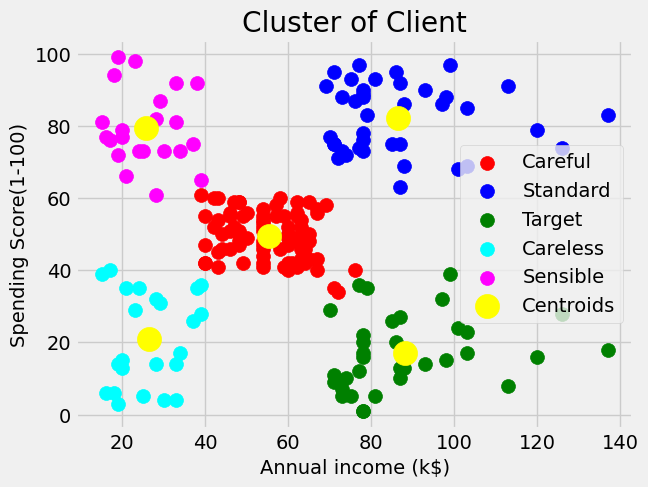

In [8]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label = 'Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label = 'Sensible')
# apply centroid for all cluster
plt.scatter(kmeans.cluster_centers_[:, 0] , kmeans.cluster_centers_[:, 1] , s=300, c='yellow', label = 'Centroids')
plt.title('Cluster of Client')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()